In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Load the data
df = pd.read_csv("similarities.csv")

# s = number of songs in the input playlist, the one used as the input for both models
# r = number of recommendations outputted - same for both models 

# Aligning it wth cosine similarity 
df["adjusted euclidean"] = 1 - df["normalized euclidean dist"]

# Convert string lists to actual lists
df["user playlist"] = df["user playlist"].apply(ast.literal_eval)
df["knn recs"] = df["knn recs"].apply(ast.literal_eval)
df["mf recs"] = df["mf recs"].apply(ast.literal_eval)


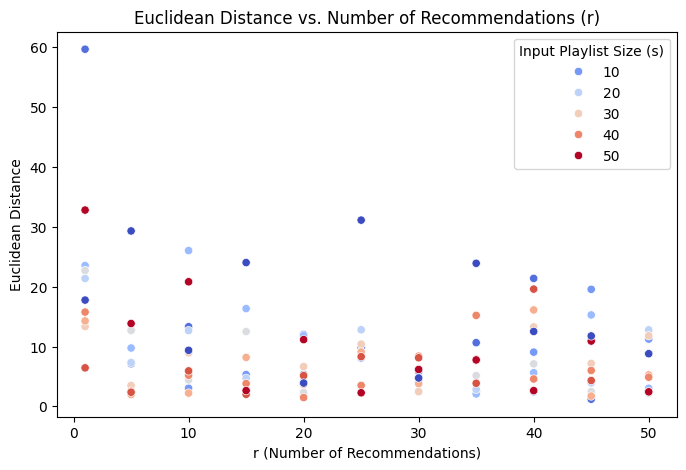

In [4]:
# TODO: I want to find a way to look at relationship between r, s but this plot has a lot going on

# Scatter plot: Euclidean Distance vs r
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["r"], y=df["euclidean dist"], hue=df["s"], palette="coolwarm")
plt.xlabel("r (Number of Recommendations)")
plt.ylabel("Euclidean Distance")
plt.title("Euclidean Distance vs. Number of Recommendations (r)")
plt.legend(title="Input Playlist Size (s)")
plt.show()

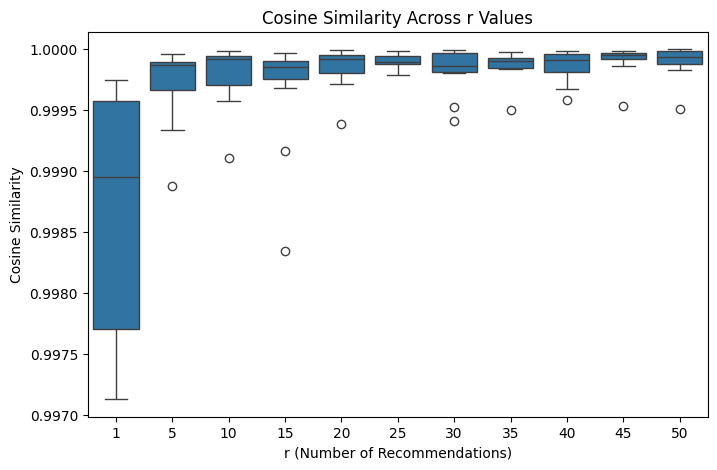

In [5]:
# Convert to long format for easier plotting
df_melted = df.melt(id_vars=["r"], value_vars=["cosine sim"], var_name="Metric", value_name="Cosine Similarity")

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["r"], y=df["cosine sim"])
plt.xlabel("r (Number of Recommendations)")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity Across r Values")
plt.show()


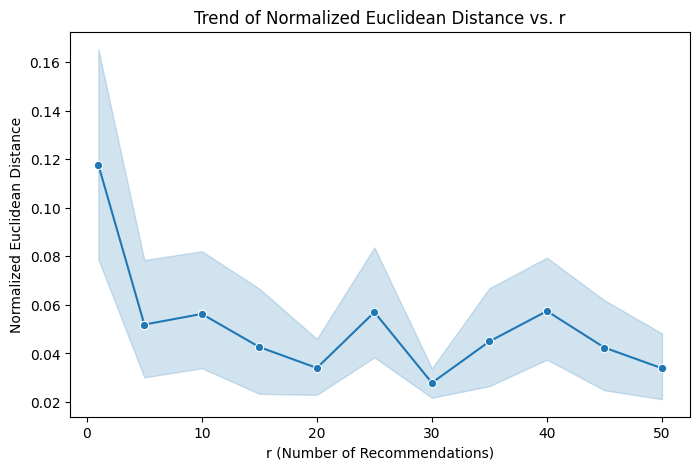

In [6]:
# Line Plot: Normalized Euclidean Distance Across r
# How normalized Euclidean distance changes with r for both models

plt.figure(figsize=(8, 5))
sns.lineplot(x=df["r"], y=df["normalized euclidean dist"], marker="o")
plt.xlabel("r (Number of Recommendations)")
plt.ylabel("Normalized Euclidean Distance")
plt.title("Trend of Normalized Euclidean Distance vs. r")
plt.show()


/tmp/ipykernel_2802685/3890072429.py:4: FutureWarning: The provided callable <function mean at 0x1550ccf5ed40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(index="r", values="euclidean dist", aggfunc=np.mean)


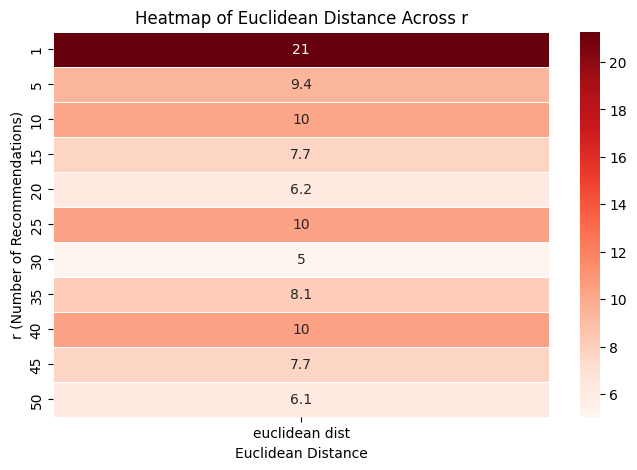

In [7]:
# Heatmap: Euclidean Distance Across r

# Pivot table to structure data for a heatmap (average Euclidean distance for each r)
heatmap_data = df.pivot_table(index="r", values="euclidean dist", aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, linewidths=0.5)

# Formatting the heatmap
plt.xlabel("Euclidean Distance")
plt.ylabel("r (Number of Recommendations)")
plt.title("Heatmap of Euclidean Distance Across r")
plt.show()


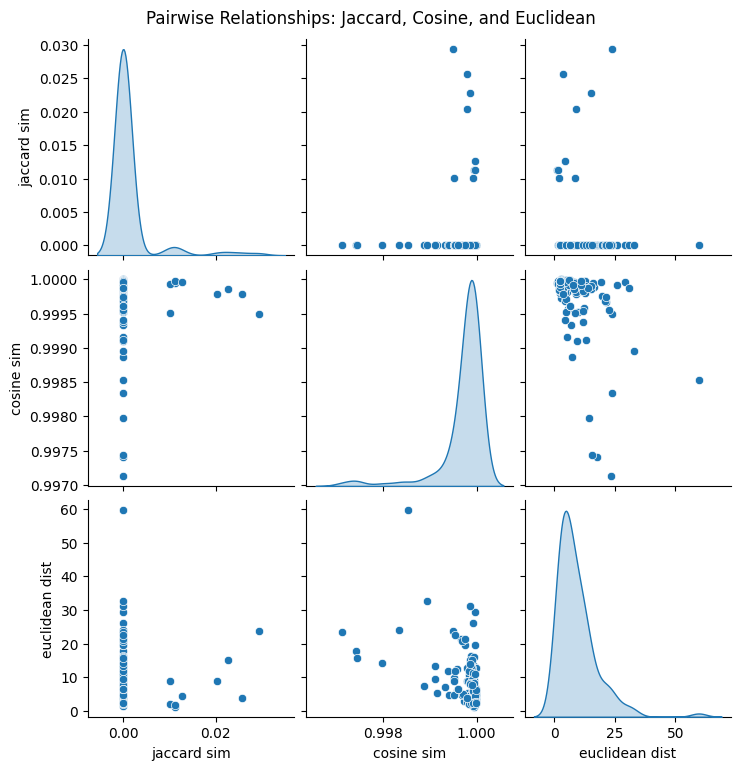

In [8]:
# Pairplot to visualize scatter plots between similarity metrics
sns.pairplot(df, vars=["jaccard sim", "cosine sim", "euclidean dist"], diag_kind="kde")

# Show the plot
plt.suptitle("Pairwise Relationships: Jaccard, Cosine, and Euclidean", y=1.02)
plt.show()

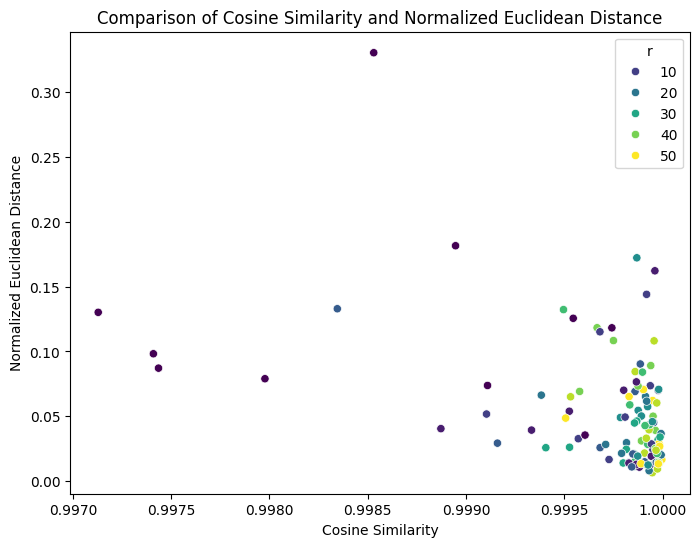

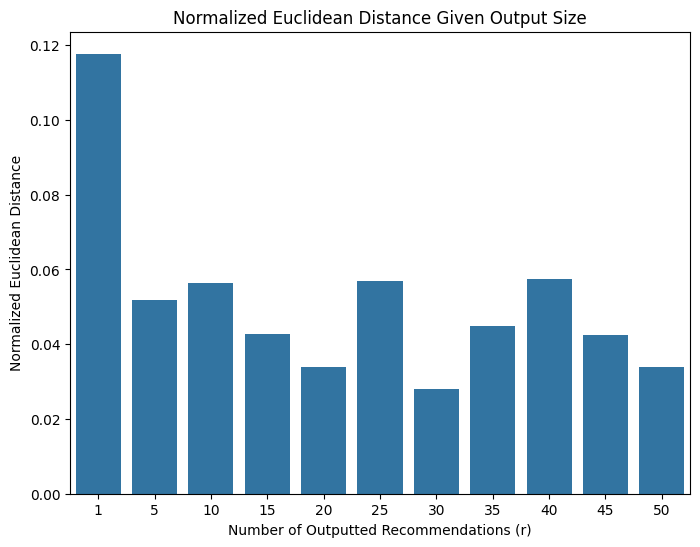

In [9]:
# Visualize the relationship between similarity measures, given different R vals


# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["cosine sim"], y=df["normalized euclidean dist"], hue=df["r"], palette="viridis")

plt.xlabel("Cosine Similarity")
plt.ylabel("Normalized Euclidean Distance")
plt.title("Comparison of Cosine Similarity and Normalized Euclidean Distance")

# Show plot
plt.show()



# Bar plot 
plt.figure(figsize=(8, 6))
sns.barplot(df, x="r", y="normalized euclidean dist", legend=False, errorbar=None)

plt.xlabel("Number of Outputted Recommendations (r)")
plt.ylabel("Normalized Euclidean Distance")
plt.title("Normalized Euclidean Distance Given Output Size")

plt.show()



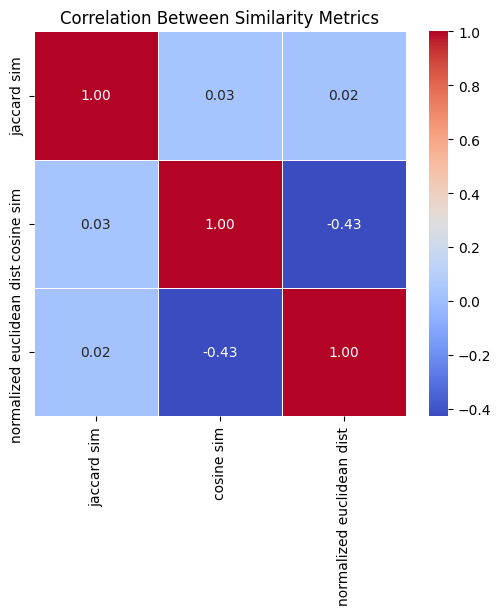

In [10]:
# Compute correlation matrix
corr_matrix = df[["jaccard sim", "cosine sim", "normalized euclidean dist"]].corr()
# corr_matrix = df[["adjusted euclidean", "cosine sim", "jaccard sim"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Similarity Metrics")
plt.show()

# Note: the correlation between euclidean and cosine is negative because they have an inverse relationship:
# A smaller euclidean value signifies similarity, while a higher cosine value does the same 



Get Statistics:

In [11]:
# Basic descriptive stats
summary_stats = df[["euclidean dist", "normalized euclidean dist", "cosine sim", "jaccard sim"]].describe()
print(summary_stats)

       euclidean dist  normalized euclidean dist  cosine sim  jaccard sim
count      121.000000                 121.000000  121.000000   121.000000
mean         9.303992                   0.051469    0.999715     0.001269
std          8.254138                   0.045661    0.000502     0.004897
min          1.194875                   0.006610    0.997129     0.000000
25%          3.804757                   0.021048    0.999750     0.000000
50%          7.129031                   0.039437    0.999882     0.000000
75%         12.512429                   0.069217    0.999948     0.000000
max         59.658417                   0.330024    0.999996     0.029412


In [12]:
# Compute Pearson correlation and p-value
# Pearson correlation coefficient measures the linear relationship between two datasets
# Varies between -1 and +1, with 0 implying no correlation
corr, p_value = pearsonr(df["cosine sim"], df["normalized euclidean dist"])

print(f"Correlation: {corr:.2f}, P-value: {p_value:.10f}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant (reject H0).")
else:
    print("The correlation is NOT statistically significant (fail to reject H0).")


Correlation: -0.43, P-value: 0.0000009574
The correlation is statistically significant (reject H0).


In [13]:
# Correlation matrix (how strongly each metric is related)
# These stats are also shown in the heatmap above 
corr_matrix = df[["euclidean dist", "normalized euclidean dist", "cosine sim", "jaccard sim"]].corr()
print(corr_matrix)

                           euclidean dist  normalized euclidean dist  \
euclidean dist                   1.000000                   1.000000   
normalized euclidean dist        1.000000                   1.000000   
cosine sim                      -0.428262                  -0.428262   
jaccard sim                      0.021555                   0.021555   

                           cosine sim  jaccard sim  
euclidean dist              -0.428262     0.021555  
normalized euclidean dist   -0.428262     0.021555  
cosine sim                   1.000000     0.030290  
jaccard sim                  0.030290     1.000000  


In [14]:
# Could we calculate the cosine similarity/euclidean dist between the input playlist and the output playlist ?? 
# Right now, we're only calculating the similarity between the two outputs. 
# If we compute the input vs. output similarities and then compare for mf and knn, could we say which was more successful?

## s vs r heatmaps for each metric

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot on each subplot
sns.barplot(data=df, x='Category', y='Value1', ax=axes[0, 0])
sns.barplot(data=df, x='Category', y='Value2', ax=axes[0, 1])
sns.barplot(data=df, x='Category', y='Value3', ax=axes[1, 0])

Index(['user playlist', 'knn recs', 'mf recs', 's', 'r', 'euclidean dist',
       'normalized euclidean dist', 'cosine sim', 'jaccard sim',
       'adjusted euclidean'],
      dtype='object')

In [111]:
df_euc_pivot = df.pivot(index="s", columns="r", values="euclidean dist")
df_n_euc_pivot = df.pivot(index="s", columns="r", values="normalized euclidean dist")
df_cosine_pivot = df.pivot(index="s", columns="r", values="cosine sim")
df_jaccard_pivot = df.pivot(index="s", columns="r", values="jaccard sim")

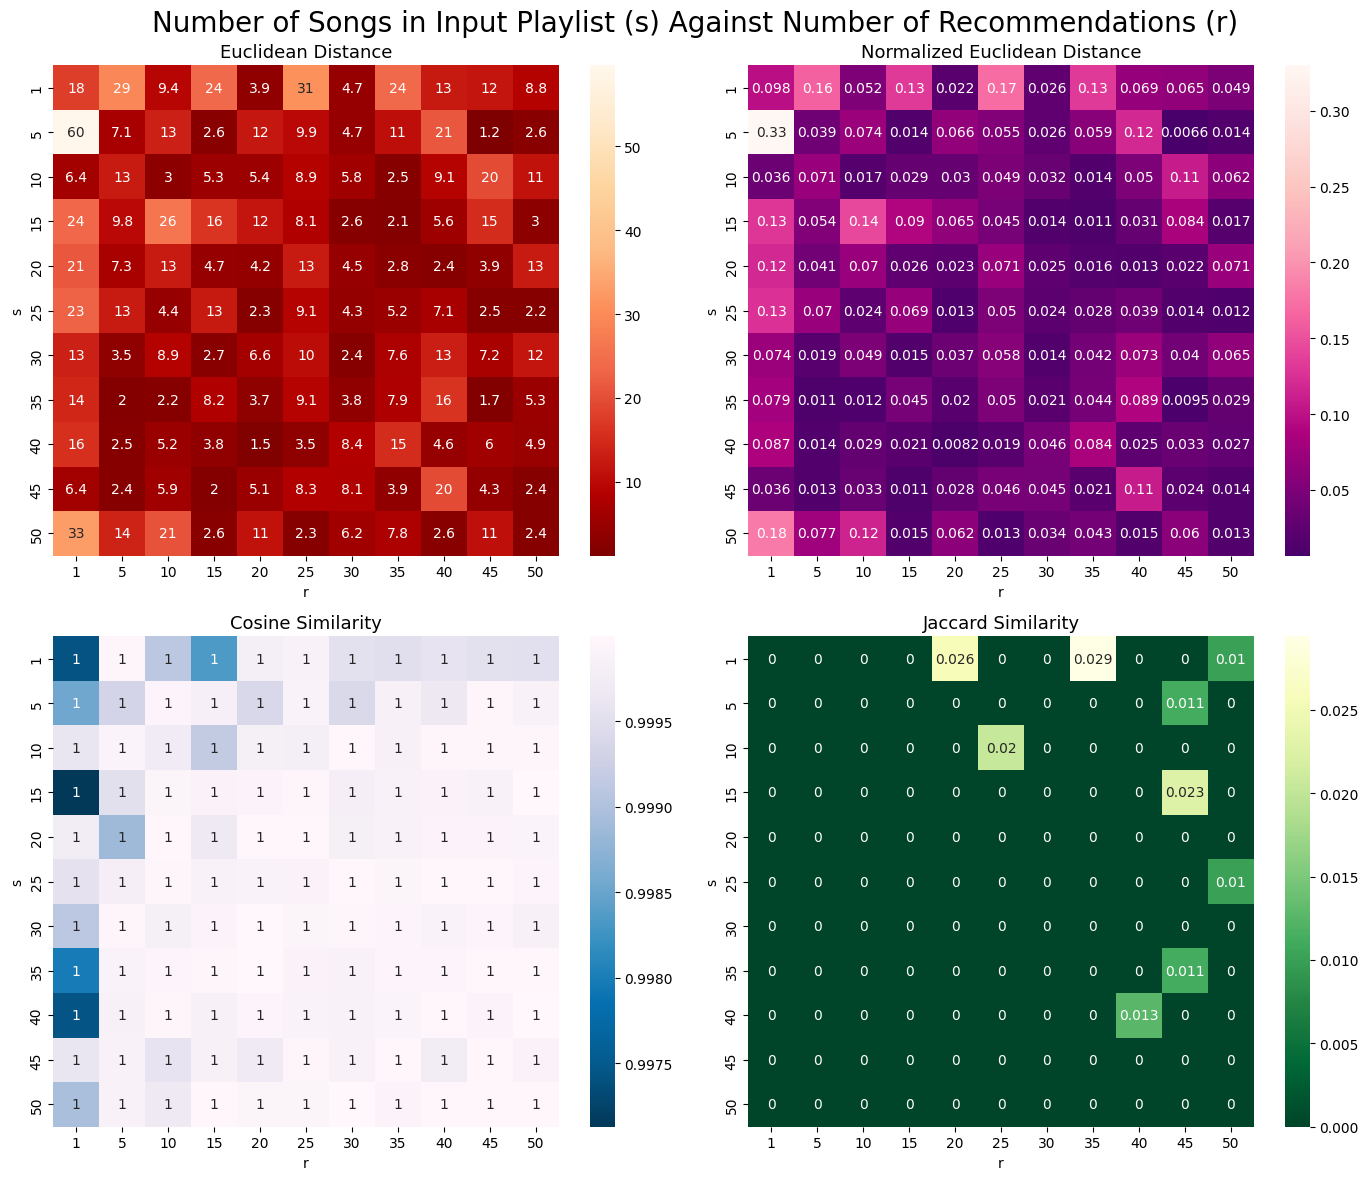

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(df_euc_pivot, annot=True, cmap='OrRd_r', ax=axes[0, 0])
sns.heatmap(df_n_euc_pivot, annot=True, cmap='RdPu_r', ax=axes[0, 1])
sns.heatmap(df_cosine_pivot, annot=True, cmap='PuBu_r', ax=axes[1, 0])
sns.heatmap(df_jaccard_pivot, annot=True, cmap='YlGn_r', ax=axes[1, 1])

axes[0, 0].set_title('Euclidean Distance', fontsize=13)
axes[0, 1].set_title('Normalized Euclidean Distance', fontsize=13)
axes[1, 0].set_title('Cosine Similarity', fontsize=13)
axes[1, 1].set_title('Jaccard Similarity', fontsize=13)

fig.suptitle("Number of Songs in Input Playlist (s) Against Number of Recommendations (r)", fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()

fig.savefig('s_r_heatmap.png')
